# Boosting Techniques Assignment

---

**Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.**

->

- Boosting is an ensemble learning technique that combines multiple weak learners to form a strong learner with high accuracy.

- It works in a sequential manner, where each new model is trained to correct the errors (misclassifications or residuals) made by the previous ones.
---
**How Boosting Improves Weak Learners**

- Each weak learner focuses on the mistakes of the previous learners, thereby reducing bias.

- By combining many weak learners, the final model achieves low bias and low variance.

- The final decision is made using a weighted ensemble, where stronger learners have higher influence.
---

**Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**

->

**AdaBoost (Adaptive Boosting):**
- Assigns weights to training samples.
- Initially, all samples have equal weight.
- After each round, weights of misclassified samples are increased, so the next weak learner focuses more on difficult cases.
- Final model = weighted majority vote (classification) or weighted sum (regression) of all learners.
---
**Gradient Boosting:**

- Does not reweight samples directly.
- Instead, it fits the next weak learner to the residual errors (gradients of the loss function) of the current model.
- Each new learner tries to minimize the loss function using gradient descent.
- Final model = additive combination of all learners.

---

**Question 3: How does regularization help in XGBoost?**

->

- XGBoost (Extreme Gradient Boosting) introduces regularization terms in its objective function to control model complexity.
- The objective = Loss function + Regularization term.

**How Regularization Helps:**

- Prevents overfitting by penalizing overly complex trees.

- Encourages the model to use simpler trees with fewer splits.

- Improves generalization on unseen data.

- Balances between bias and variance.
---

**Question 4: Why is CatBoost considered efficient for handling categorical data?**

->
- CatBoost (Categorical Boosting) is a gradient boosting algorithm specially designed to handle categorical features without heavy preprocessing.
- Unlike other boosting algorithms, it does not require one-hot encoding or label encoding, which makes it more efficient.

**Why it is efficient:**

- Uses Ordered Target Statistics (a technique to convert categorical features into numerical values based on target statistics while avoiding target leakage).

- Handles high-cardinality categorical features effectively without exploding feature space.

- Reduces the need for manual preprocessing → saves time and avoids data sparsity.

- Minimizes overfitting by using permutation-driven encoding and randomization.

- Works well out-of-the-box, making it faster and more accurate for datasets with many categorical variables.
---

**Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?**

->
1. **Fraud Detection**: Boosting is effective in detecting rare fraudulent transactions by focusing on hard-to-classify cases.
2. **Credit Risk Modeling** : Banks/financial institutions use boosting to predict loan default more accurately.
3. **Customer Churn Prediction** : Telecom and subscription businesses use boosting to identify customers likely to leave.
4. **Medical Diagnosis** : Helps in disease classification (e.g., cancer detection) where capturing subtle patterns is critical.
5. **Search Engines & Recommendation Systems** : Boosting improves ranking algorithms (used by Google, YouTube, Netflix).
6. **Natural Language Processing (NLP)** : Sentiment analysis, spam detection, and text classification often rely on boosting models.

---

**Question 6: Write a Python program to:**
- Train an AdaBoost Classifier on the Breast Cancer dataset
- Print the model accuracy

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = load_breast_cancer()

In [3]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
X = df.drop('target', axis=1)
y = df['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
model = AdaBoostClassifier()

In [9]:
model.fit(X_train, y_train)

AdaBoostClassifier()

In [10]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1])

In [11]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9736842105263158


**Question 7: Write a Python program to:**
- Train a Gradient Boosting Regressor on the California Housing dataset
- Evaluate performance using R-squared score


In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [13]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [14]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
X = df.drop('target', axis=1)
y = df['target']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
model = GradientBoostingRegressor()

In [18]:
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [19]:
y_pred = model.predict(X_test)
y_pred

array([3.32334545, 0.6552781 , 2.55047153, ..., 2.64364545, 2.28179468,
       1.18449699])

In [20]:
print(f"R-squared score: {r2_score(y_test, y_pred)}")

R-squared score: 0.7790292799949292


**Question 8: Write a Python program to:**
- Train an XGBoost Classifier on the Breast Cancer dataset
- Tune the learning rate using GridSearchCV
- Print the best parameters and accuracy

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [22]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [23]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [24]:
X = df.drop('target', axis=1)
y = df['target']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
model = XGBClassifier()

In [27]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [28]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1])

In [29]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.956140350877193


In [30]:
# Tuning the model
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

In [31]:
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=3)

In [32]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ................learning_rate=0.01;, score=0.890 total time=   2.5s
[CV 2/5] END ................learning_rate=0.01;, score=0.945 total time=   2.0s
[CV 3/5] END ................learning_rate=0.01;, score=1.000 total time=   1.0s
[CV 4/5] END ................learning_rate=0.01;, score=0.945 total time=   0.2s
[CV 5/5] END ................learning_rate=0.01;, score=0.945 total time=   0.2s
[CV 1/5] END ................learning_rate=0.05;, score=0.901 total time=   0.2s
[CV 2/5] END ................learning_rate=0.05;, score=0.923 total time=   0.2s
[CV 3/5] END ................learning_rate=0.05;, score=0.978 total time=   0.2s
[CV 4/5] END ................learning_rate=0.05;, score=0.945 total time=   0.2s
[CV 5/5] END ................learning_rate=0.05;, score=0.967 total time=   0.2s
[CV 1/5] END .................learning_rate=0.1;, score=0.912 total time=   0.1s
[CV 2/5] END .................learning_rate=0.1;,

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]},
             verbose=3)

In [33]:
grid_search.best_params_

{'learning_rate': 0.3}

In [34]:
grid_search.best_score_

np.float64(0.9516483516483516)

In [35]:
y_pred = grid_search.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1])

In [36]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Best Parameters:", grid_search.best_params_)

Accuracy: 0.956140350877193
Best Parameters: {'learning_rate': 0.3}


**Question 9: Write a Python program to:**
- Train a CatBoost Classifier
- Plot the confusion matrix using seaborn

In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [39]:
X = df.drop('target', axis=1)
y = df['target']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [41]:
model = CatBoostClassifier()

In [42]:
model.fit(X_train, y_train)

Learning rate set to 0.00736
0:	learn: 0.6792793	total: 57.5ms	remaining: 57.5s
1:	learn: 0.6668602	total: 64.8ms	remaining: 32.4s
2:	learn: 0.6549962	total: 72ms	remaining: 23.9s
3:	learn: 0.6437548	total: 79.4ms	remaining: 19.8s
4:	learn: 0.6317878	total: 86.8ms	remaining: 17.3s
5:	learn: 0.6212843	total: 94.2ms	remaining: 15.6s
6:	learn: 0.6091358	total: 101ms	remaining: 14.4s
7:	learn: 0.5980149	total: 109ms	remaining: 13.5s
8:	learn: 0.5855567	total: 116ms	remaining: 12.8s
9:	learn: 0.5762765	total: 123ms	remaining: 12.2s
10:	learn: 0.5652399	total: 131ms	remaining: 11.7s
11:	learn: 0.5555980	total: 138ms	remaining: 11.4s
12:	learn: 0.5470094	total: 145ms	remaining: 11s
13:	learn: 0.5385749	total: 152ms	remaining: 10.7s
14:	learn: 0.5302810	total: 163ms	remaining: 10.7s
15:	learn: 0.5206013	total: 170ms	remaining: 10.5s
16:	learn: 0.5129461	total: 178ms	remaining: 10.3s
17:	learn: 0.5049799	total: 186ms	remaining: 10.1s
18:	learn: 0.4978984	total: 193ms	remaining: 9.97s
19:	learn:

In [43]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1])

In [44]:
confusion_matrix(y_test, y_pred)

array([[38,  4],
       [ 0, 72]])

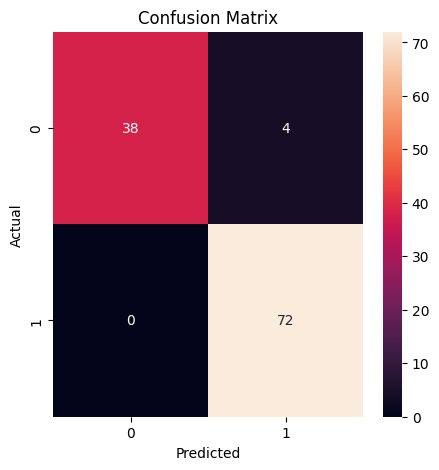

In [45]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior. The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.**

Describe your step-by-step data science pipeline using boosting techniques:
- Data preprocessing & handling missing/categorical values
- Choice between AdaBoost, XGBoost, or CatBoost
- Hyperparameter tuning strategy
- Evaluation metrics you'd choose and why
- How the business would benefit from your model


->

1. **Data Preprocessing:**  
   I will handle missing values by imputing numeric features with mean or median and categorical features with mode or a separate “missing” category.  
   Since CatBoost can handle missing values natively, it reduces the need for manual imputation.  
   For categorical variables, one-hot or target encoding is required if I use AdaBoost or XGBoost, but CatBoost can directly process categorical features.  
   To address the imbalance in the dataset, I will apply techniques like SMOTE, random oversampling, or class weights.  
   In the case of XGBoost, I can also use the `scale_pos_weight` parameter to balance the classes.  
   Feature scaling is not required because tree-based boosting algorithms are insensitive to scale.

2. **Choice of Boosting Algorithm:**  
   Among AdaBoost, XGBoost, and CatBoost, I will prefer CatBoost for this problem because it can efficiently handle both categorical features and missing values without complex preprocessing.  
   AdaBoost is less effective for large datasets with mixed feature types, while XGBoost is strong but requires additional preprocessing for categorical data.  
   Therefore, CatBoost is the most suitable algorithm for this dataset.

3. **Hyperparameter Tuning:**  
   I will tune the model using Grid Search, Randomized Search, or Bayesian Optimization combined with Stratified K-Fold Cross Validation to ensure balanced evaluation.  
   The important parameters I will tune include the learning rate to control the step size, max_depth to control the tree complexity, n_estimators to define the number of boosting rounds, l2_leaf_reg for regularization, and scale_pos_weight to handle class imbalance.  

4. **Model Evaluation Metrics:**  
   Since the dataset is imbalanced, accuracy is not a reliable measure.  
   Instead, I will use metrics such as ROC-AUC to measure the discrimination ability of the model, Precision and Recall to monitor the trade-off between false positives and false negatives, and F1-score to balance precision and recall.  
   I will also use the Precision-Recall AUC (PR-AUC), which is especially important for imbalanced datasets.  

5. **Business Impact:**  
   By applying this boosting pipeline, the model will help the company identify high-risk borrowers more accurately.  
   This will allow early detection of potential defaults and reduce the risk of giving loans to customers who are unlikely to repay.  
   The company will benefit from reduced financial losses, improved credit scoring, and safer loan portfolios.  
   Ultimately, this will increase customer trust and lead to sustainable business profitability.

---